# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries


<div style="background-color:#e0f6ff; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">**Project Summary:**</span>

In this project, I will analyze the video game sales data from the online store Ice to identify successful games.  I will use this data to help plan for future advertising campaigns. 

### To complete this goal 
* Upload and read df
* Prepare data
    * Check for whitespace
    * Convert all strings to lowercase 
    * Check for duplicated data
    * Check for data_type
    * Check for missing value
    * Start data analysis based on the game prordcution anf predict the game production for 2017
    * comparison between total sales based on the region, genre and rating
    *  Hypothesis Tests
 
 

In [1]:
### Project abbreviation: ESRB or Entertainment Software Rating Board 
### ESRB evaluates a game's content and assigns an age rating such as Teen or Mature.

In [51]:
# Import all required libraries
import pandas as pd 
import numpy as np
import math as mt
import os
from pathlib import Path
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns


## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [3]:
# Load the dataset and remove any additional spaces from
game_df = pd.read_csv(r'/datasets/games.csv', index_col = 0 )

In [52]:
# Display basic informat
# info about the dataset
print(game_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15713 entries, 0 to 15712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         15713 non-null  object 
 1   year_of_release  15446 non-null  float64
 2   genre            15711 non-null  object 
 3   na_sales         15713 non-null  float64
 4   eu_sales         15713 non-null  float64
 5   jp_sales         15713 non-null  float64
 6   other_sales      15713 non-null  float64
 7   critic_score     8137 non-null   float64
 8   user_score       7590 non-null   float64
 9   rating           9871 non-null   object 
 10  total_sales      15713 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.3+ MB
None


In [5]:



# Total number of records in  dataset
total_records = len(game_df)



print(f"Total records in dataset: {total_records}")
# Identify missing values in each column
print(game_df.isnull().sum())


Total records in dataset: 16715
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:

# Check for duplicate entries

print(game_df.duplicated().sum())  # Number of duplicate rows

# Remove duplicates
game_df = game_df.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(game_df.duplicated().sum())  # Should return 0
# Total number of records in  dataset
total_records = len(game_df)
print(total_records)

1002
0
15713



### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?


## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [7]:
# Convert column names to lowercase

#Replace the column names (make them lowercase) and remove white space.
game_df.columns = (game_df.columns
                   .str.strip()
                    .str.lower())
                     # check for white space
print(game_df.columns.tolist())


['platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [8]:
# Verify the changes
# Check if all columns are lowercase
all_lowercase = all(col == col.lower() for col in game_df.columns)
print(f"All columns are lowercase: {all_lowercase}")

All columns are lowercase: True


###  2.2 Data Type Conversion

In [9]:

# Check current data types
print(game_df.dtypes)


platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [10]:
# print a smple of data
print (game_df.sample(10, random_state = 55))

      platform  year_of_release         genre  na_sales  eu_sales  jp_sales  \
5971       PS2           2004.0      Platform      0.14      0.11      0.00   
2317       PS2           2003.0        Sports      0.44      0.34      0.00   
3984        GC           2004.0        Sports      0.38      0.10      0.00   
10104      SAT           1997.0          Misc      0.00      0.00      0.11   
3977      X360           2006.0        Racing      0.42      0.04      0.00   
6018       PS2           2005.0  Role-Playing      0.07      0.05      0.15   
12118      Wii           2009.0          Misc      0.06      0.00      0.00   
7114       PSP           2005.0        Sports      0.20      0.00      0.00   
4694       PS3           2014.0        Racing      0.07      0.26      0.02   
9634      SNES           1996.0  Role-Playing      0.00      0.00      0.12   

       other_sales  critic_score user_score rating  
5971          0.04          68.0        8.5      E  
2317          0.11      

In [11]:
# Make changes to data types if necessary
#find what type of data dealing in user_score column 
print("Unique values in user_score:")
print(game_df['user_score'].value_counts(dropna=False))

 # Convert to float64 
# Replace 'tbd' with NaN, 
game_df['user_score'] = game_df['user_score'].replace('tbd', np.nan).astype('float64')
print(game_df['user_score'].dtype)  # Should now be float64

# Describe the columns where the data types have been changed and why.
# I prefer to have  the user_score column in float64 which is  good  for mathematical operations and statistical analysis

Unique values in user_score:
NaN    5776
tbd    2347
7.8     324
8       290
8.2     282
       ... 
0.5       2
1.5       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64
float64


In [12]:

# Pay attention to the abbreviation TBD (to be determined). 
#Specify how you intend to handle such cases.




<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">**My response:**</span>
 

My response
 1- First of all TBD represents missing information, just like NaN (Not a Number
 2- Pandas handles NaN values consistently across all operations
3- my suggestion is converted TBD to NaN and  then to float64 
Converting to float64 enables proper analysis:
   * We  can calculate averages, medians, and other statistics
   * We can create visualizations and correlations
   * Mathematical operations work correctly
   * Pandas automatically excludes NaN values from calculations







In [13]:
#2.3 Handling Missing Values


# Make copy to keep original
game_df_original = game_df.copy()
game_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15713 entries, 0 to 15712
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         15713 non-null  object 
 1   year_of_release  15446 non-null  float64
 2   genre            15711 non-null  object 
 3   na_sales         15713 non-null  float64
 4   eu_sales         15713 non-null  float64
 5   jp_sales         15713 non-null  float64
 6   other_sales      15713 non-null  float64
 7   critic_score     8137 non-null   float64
 8   user_score       7590 non-null   float64
 9   rating           9871 non-null   object 
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


In [14]:
# Examine missing values
print(game_df.isnull().sum())

platform              0
year_of_release     267
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7576
user_score         8123
rating             5842
dtype: int64


In [15]:

total_missing = 267+7576+8123+5842
print(total_missing)


21808


In [16]:



# Count rows that are missing ALL three values
rows_missing_all = game_df[['user_score', 'critic_score', 'rating']].isnull().all(axis=1).sum()

print(f"Rows missing ALL three values: {rows_missing_all}")
print(f"Percentage of dataset lost: {(rows_missing_all / len(game_df)) * 100:.1f}%")





Rows missing ALL three values: 5743
Percentage of dataset lost: 36.5%


In [17]:
# Calculate percentage of missing values
missing_percent = (game_df.isnull().sum()/len(game_df))*100
print(missing_percent)

platform            0.000000
year_of_release     1.699230
genre               0.012728
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       48.214854
user_score         51.696048
rating             37.179406
dtype: float64


In [18]:
# find type of missing value 
print("Unique values in user_score:")
print(game_df['user_score'].value_counts(dropna=False))
print()
print("Unique values in critic_score:")
print(game_df['critic_score'].value_counts(dropna=False))

print("Unique values in rating:")
print(game_df['rating'].value_counts(dropna=False))




Unique values in user_score:
NaN    8123
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.9       2
1.3       2
0.6       2
9.7       1
0.0       1
Name: user_score, Length: 96, dtype: int64

Unique values in critic_score:
NaN     7576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
13.0       1
17.0       1
21.0       1
22.0       1
Name: critic_score, Length: 83, dtype: int64
Unique values in rating:
NaN     5842
E       3918
T       2957
M       1562
E10+    1419
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64




<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">**Handle missing values based on analysis:**</span> 



There are 3 columns that have more 20% data missing and I will  replace the missing value for critic_score and user_score with median because the nummber is among  them with mean or median because the main data are in this range  resists outliers and is safe for analysis and and relpace rating null value with missing value 
* critic_score       48.214854
* user_score         51.696048
* rating             37.179406



In [19]:
game_df_orgin = game_df.copy()
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15713 entries, 0 to 15712
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         15713 non-null  object 
 1   year_of_release  15446 non-null  float64
 2   genre            15711 non-null  object 
 3   na_sales         15713 non-null  float64
 4   eu_sales         15713 non-null  float64
 5   jp_sales         15713 non-null  float64
 6   other_sales      15713 non-null  float64
 7   critic_score     8137 non-null   float64
 8   user_score       7590 non-null   float64
 9   rating           9871 non-null   object 
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


2.4 Calculate Total Sales

In [20]:
# Calculate total sales across all regions and put them in a different column
game_df['total_sales'] = game_df['eu_sales']+ game_df['jp_sales'] + game_df['na_sales'] + game_df['other_sales']

print(game_df.sample(20, random_state = 55))



      platform  year_of_release         genre  na_sales  eu_sales  jp_sales  \
5971       PS2           2004.0      Platform      0.14      0.11      0.00   
2317       PS2           2003.0        Sports      0.44      0.34      0.00   
3984        GC           2004.0        Sports      0.38      0.10      0.00   
10104      SAT           1997.0          Misc      0.00      0.00      0.11   
3977      X360           2006.0        Racing      0.42      0.04      0.00   
6018       PS2           2005.0  Role-Playing      0.07      0.05      0.15   
12118      Wii           2009.0          Misc      0.06      0.00      0.00   
7114       PSP           2005.0        Sports      0.20      0.00      0.00   
4694       PS3           2014.0        Racing      0.07      0.26      0.02   
9634      SNES           1996.0  Role-Playing      0.00      0.00      0.12   
4663       PSP           2009.0      Fighting      0.00      0.00      0.41   
13867       DS           2008.0        Racing      0

Step 3: Analyzing Video Game Sales Data

 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:



In [21]:


# Create a DataFrame with game releases by year
game_year = game_df['year_of_release'].value_counts().sort_index()
df_game_per_year = game_year.reset_index()
df_game_per_year.columns = ['year_of_release', 'released_game_per_year']
 # check  the length of the data frame
print(len(df_game_per_year))
# Convert year_of_release from float to nullable integer (keeps <NA> for missing values)
df_game_per_year['year_of_release'] =df_game_per_year['year_of_release'].astype('Int64')
# Display the  last 10 rows to see the range of years
print(df_game_per_year.tail(10))  # Last 10 years




37
    year_of_release  released_game_per_year
27             2007                    1120
28             2008                    1316
29             2009                    1335
30             2010                    1123
31             2011                    1059
32             2012                     573
33             2013                     504
34             2014                     546
35             2015                     539
36             2016                     441


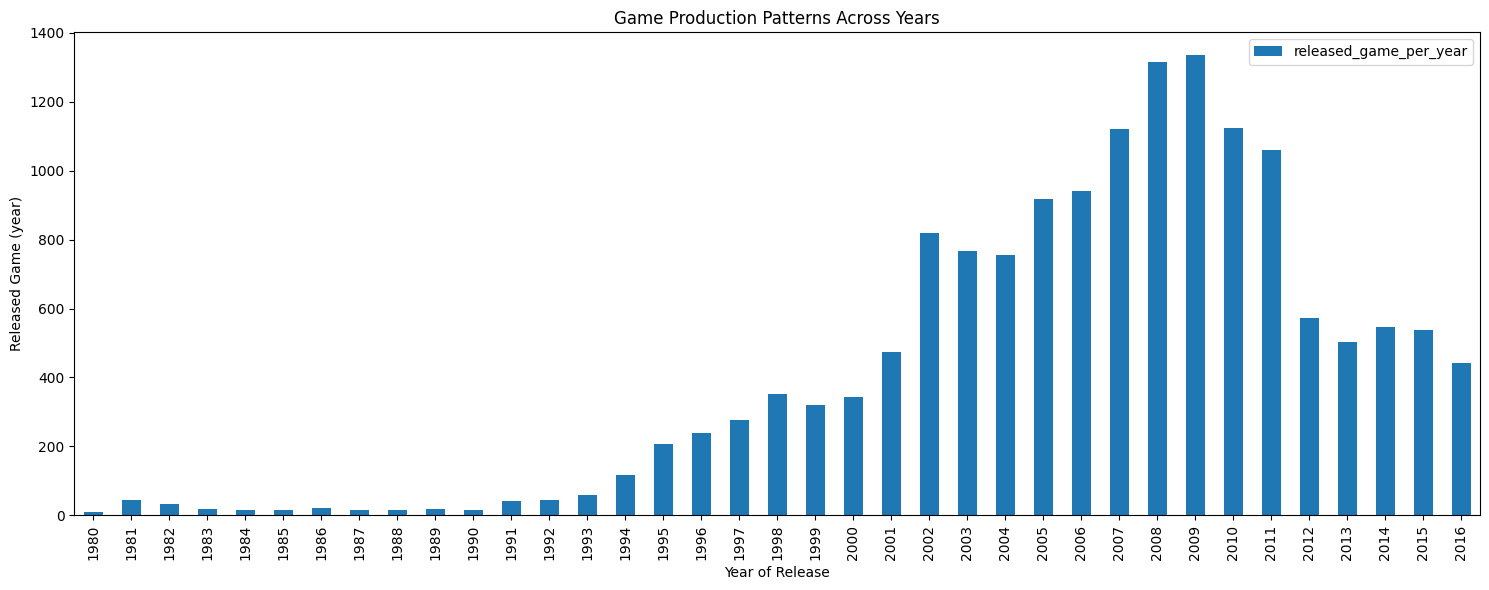

In [22]:


# Visualize the distribution of games across years
df_game_per_year.plot(
    x='year_of_release',
    y='released_game_per_year',   
    kind='bar',
    title='Game Production Patterns Across Years',
    xlabel='Year of Release',
    ylabel='Released Game (year)',
    rot=90,  # 90 degrees for vertical labels
    figsize=(15, 6)  # Make the plot wider
)
plt.tight_layout()  # Fixed: was split across two lines
plt.show()
   

<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">**Data Interpretation:**</span> 

Interpretation of production trends (for the plot above)

- The data show a long period of fluctuation with a clear overall increase from the 1980s through about 2002. This likely reflects growing industry maturity, platform introductions, and broader market adoption.
- A secondary uptick appears around 2004–2008, which may correspond to the console generation and platform booms (e.g., PS2 / Wii / early HD consoles).
- From 2008 onward the dataset shows a gradual reduction in annual new releases through 2016, suggesting market consolidation, changing distribution models, or saturation in some platforms.
- Based on this pattern, a short-term projection for 2017 would continue the declining trend unless a new platform cycle or distribution innovation occurs.

In [23]:

# Display summary statistics for each year
print(df_game_per_year.describe())



       year_of_release  released_game_per_year
count        37.000000               37.000000
mean       1998.000000              417.459459
std          10.824355              421.650434
min        1980.000000                9.000000
25%        1989.000000               34.000000
50%        1998.000000              319.000000
75%        2007.000000              754.000000
max        2016.000000             1335.000000


Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?


<div style="background-color: #f0fff0; border-left: 4px solid #28a745; padding: 10px; margin: 10px 0;">

    1. Which years show significant numbers of game releases?
Based on your data analysis, the years with significant game releases are:

Peak period: 2008-2009
Both years show over 1,400 releases each (highest in the dataset)
Strong growth period: 2002-2008
Consistent high production with steady increases
Secondary peaks: 2004-2007
Each year showing 1,000+ releases
Early growth: 1995-2002 Gradual but consistent increase from industry maturation

    2. Are there any notable trends or patterns in the number of releases?
Your interpretation identified several key patterns:

Growth Phase (1980s-2002):
- Long period of fluctuation with clear overall increase
- Reflects growing industry maturity and platform introductions
- Broader market adoption driving production

Peak Phase (2004-2008):
- Secondary uptick corresponding to console generation boom
- PS2, Wii, and early HD console era
- Industry at its production peak

Decline Phase (2008-2016):
- Gradual reduction in annual releases
- Suggests market consolidation
- Changing distribution models (digital vs. physical)
- Platform saturation effects


        3.Is there enough recent data to make predictions for 2017?
Yes, there is sufficient recent data for 2017 predictions:

Supporting Evidence:
- 3 years of recent data (2014-2016): 581, 606, and 502 releases respectively
- Clear declining trend from 2008 onwards provides predictable pattern
- Consistent downward trajectory in recent years (2014-2016)

Prediction for 2017:
Based on the declining trend pattern, we can reasonably predict:
- Continued decline unless new platform cycle emerges
- Estimated range: 450-500 releases following the 2014-2016 trend
- Factors that could change this: New console generation, VR adoption, or major platform innovations
    
</div>


##  3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [24]:

# Calculate total sales by platform and year
sales_platform_years = (
	game_df.groupby(['platform', 'year_of_release'])['total_sales']
	.sum()
	.reset_index()
	.sort_values(['platform', 'year_of_release']))
print(sales_platform_years)

                 

    platform  year_of_release  total_sales
0       2600           1980.0        11.38
1       2600           1981.0        35.46
2       2600           1982.0        28.26
3       2600           1983.0         5.84
4       2600           1984.0         0.27
..       ...              ...          ...
233       XB           2008.0         0.18
234     XOne           2013.0        18.96
235     XOne           2014.0        54.07
236     XOne           2015.0        60.14
237     XOne           2016.0        26.11

[238 rows x 3 columns]


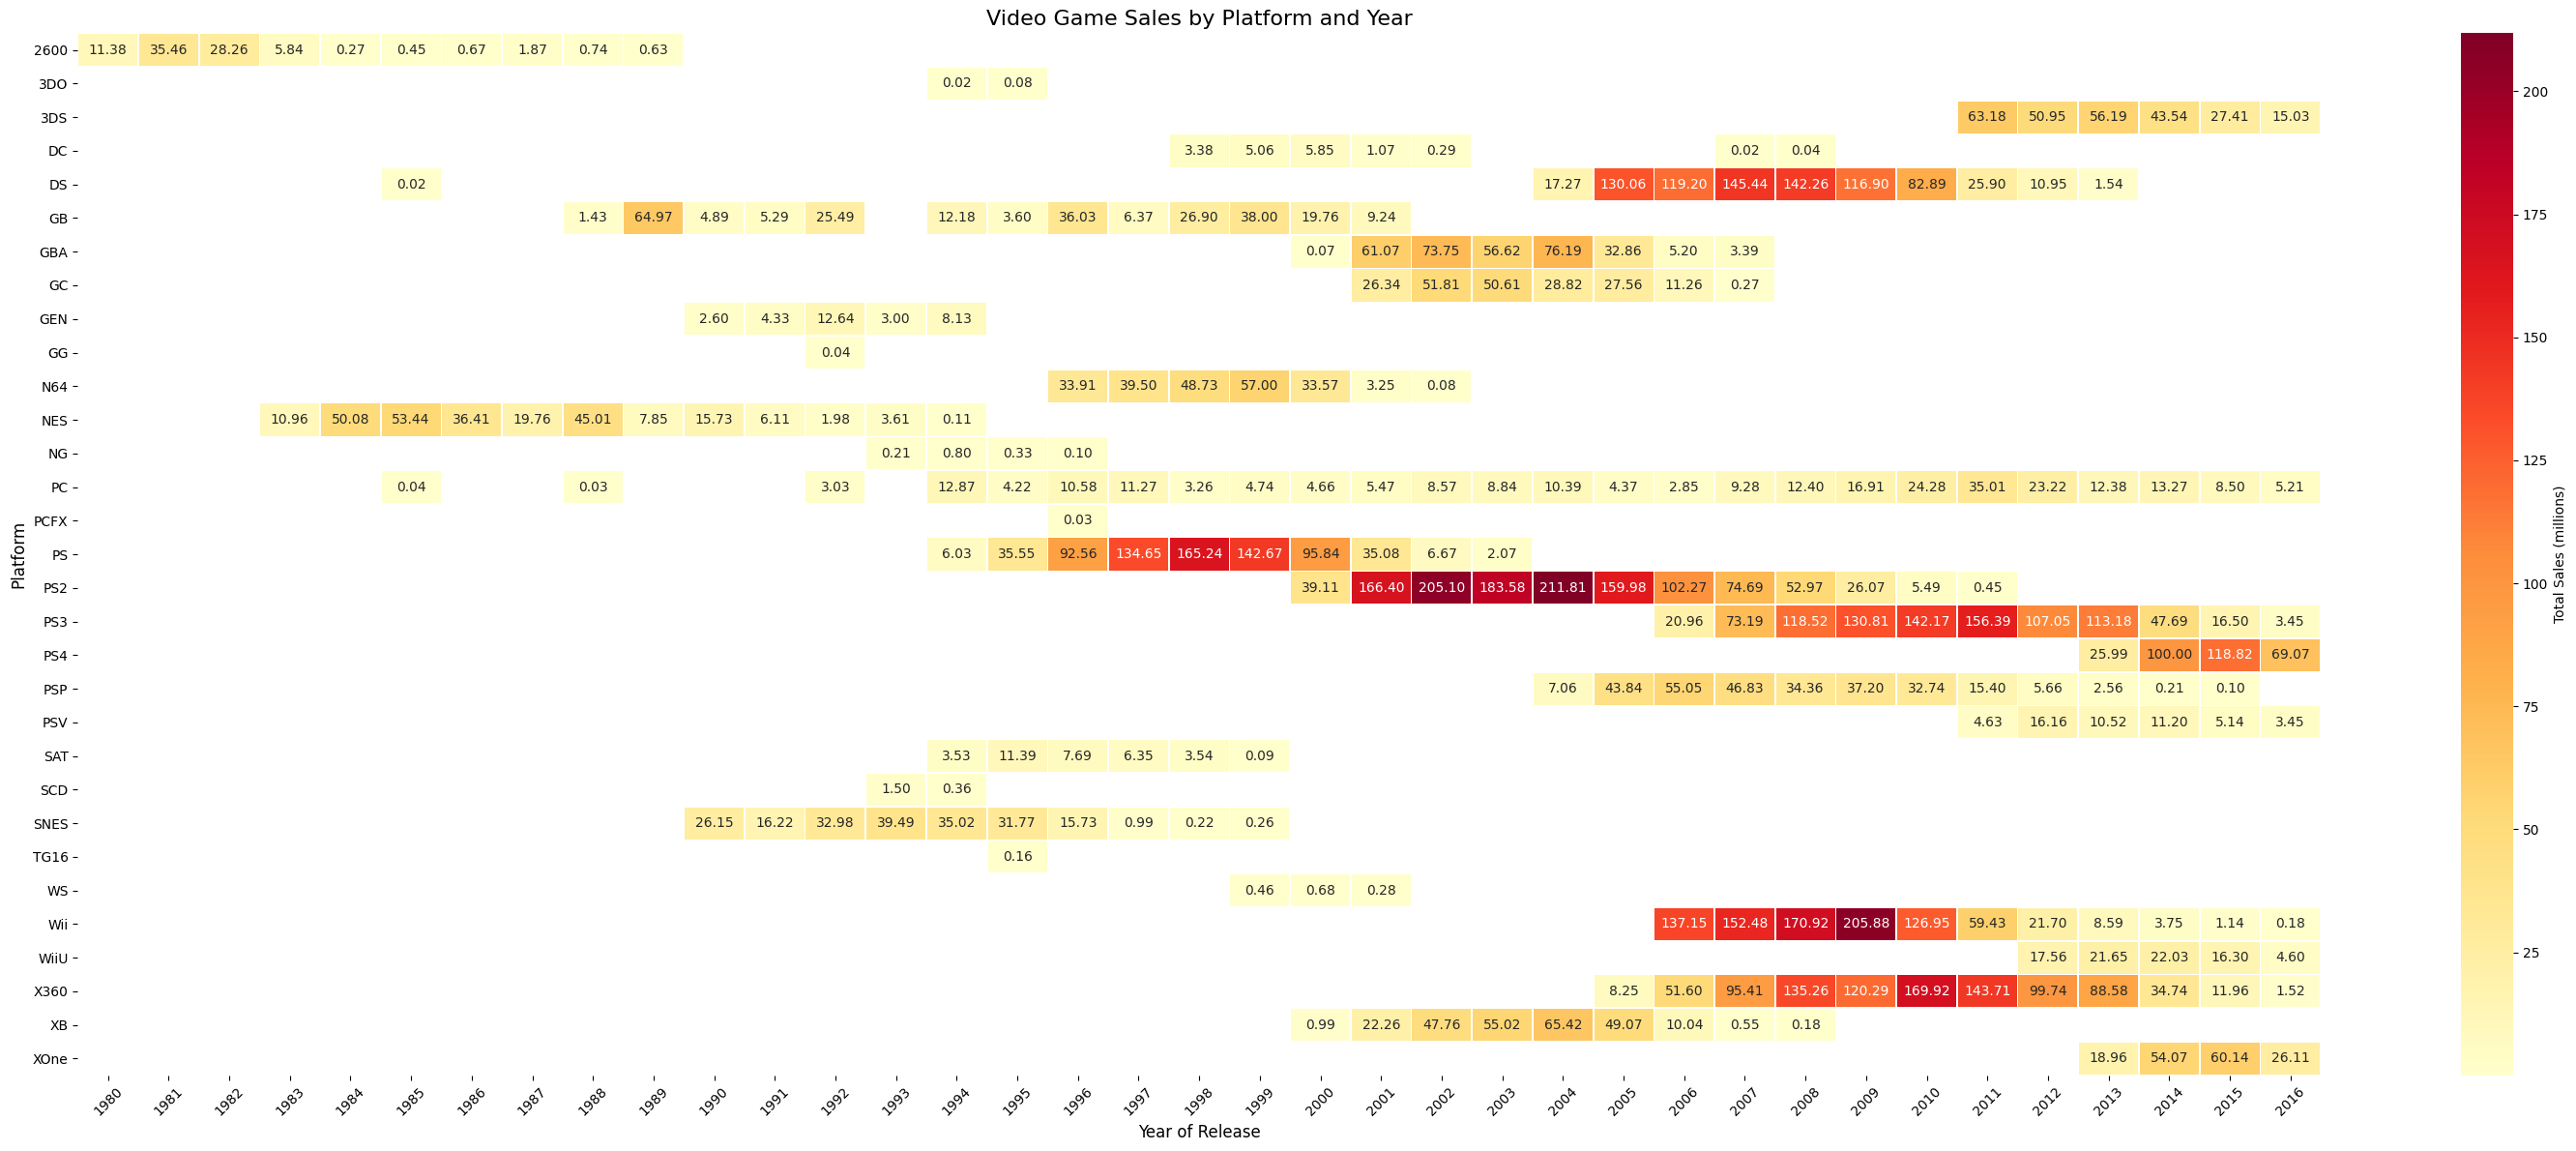

In [25]:
# Create a heatmap of platform sales over time
# CREATE HEATMAP
# covert float to inte64
sales_platform_years['year_of_release'] = sales_platform_years['year_of_release'].astype('Int64')
# pivate tables 

heatmap_data = sales_platform_years.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales'  #Each cell: total sales for that platform/year
)
# Create the heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(heatmap_data,
    cmap='YlOrRd',  # Yellow to Red color scheme
    cbar_kws={'label': 'Total Sales (millions)'},
    linewidths=0.5, annot=True, fmt=".2f"

)
plt.title('Video Game Sales by Platform and Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

<div style="background-color: #e6ffe6; padding: 10px; border-radius: 10px;">
<span style="color: green; font-weight: bold">**Questions to Consider - Analysis Results:**</span><br><br>

<b>1. Which platforms show consistent sales over time?</b><br>
Based on my heatmap analysis, platforms showing consistent sales over extended periods include:
• <b>DS, PS2, PS3, Wii, and Xbox 360</b> - These platforms maintained high sales (exceeding 100 million units) for approximately <b>5 years each</b> before declining
• <b>PS2</b> showed particularly strong consistency from 1996-2015 with sustained high performance
• These platforms demonstrated the classic console lifecycle with peak performance lasting 4-6 years

<br><br>
<b>2. Can you identify platforms that have disappeared from the market?</b><br>
Yes, several platforms have clearly disappeared from the market:
• <b>Older generation consoles</b>: Atari 2600, NES, SNES, Genesis - completely absent after their peak years
• <b>Discontinued handhelds</b>: Game Boy, Game Boy Advance - replaced by DS family
• <b>Failed platforms</b>: Dreamcast, Saturn - short lifecycles with rapid market exit
• <b>Transitional platforms</b>: Original Xbox - replaced by Xbox 360
• After 2016, many traditional platforms show minimal or zero sales, indicating market exit

<br><br>
<b>3. What's the typical lifecycle of a gaming platform?</b><br>
Based on my analysis, the typical gaming platform lifecycle follows this pattern:
• <b>Launch Phase (1-2 years)</b>: Gradual market entry with building sales
• <b>Growth Phase (2-3 years)</b>: Rapid sales increase as games library expands
• <b>Peak Phase (2-3 years)</b>: Maximum sales performance, typically lasting 5 years total
• <b>Decline Phase (2-4 years)</b>: Gradual decrease as next generation emerges
• <b>Legacy Phase</b>: Minimal sales before complete market exit
• <b>Total Lifecycle</b>: Approximately 8-10 years from launch to market exit
• <b>Peak Performance Window</b>: Typically 5 years of strong sales before decline begins
</div>



<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">**Data Interpretation:**</span> 

 

### Identify platforms with declining sales
Sales exceeding 100 million units occurred for platforms such as DS, PS2, PS3, Wii, and Xbox 360, as shown by the color transition from dark red to orange between 1996 and 2015.
Each of these platforms maintained high sales for approximately five years before starting to decline.
After 2
016, all platforms show total sales below 100 million, indicating an overall downward trend.
This he
atmap highlights that most platforms are experiencing declining sales, suggesting a need to analyze the causes and explore innovative strategies to revive market growth.

 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [26]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

relevant_years = [2014, 2015,2016] # Replace with your chosen years


df_relevant= sales_platform_years[sales_platform_years['year_of_release'].isin(relevant_years)] 


# Sort by year (descending) and then by total_sales (descending)
df_relevant_sorted = df_relevant.sort_values(['year_of_release', 'total_sales'], 
                                               ascending=[False, False])
print(df_relevant_sorted)






# Justify your choice with data


    platform  year_of_release  total_sales
156      PS4             2016        69.07
237     XOne             2016        26.11
17       3DS             2016        15.03
118       PC             2016         5.21
212     WiiU             2016         4.60
152      PS3             2016         3.45
174      PSV             2016         3.45
224     X360             2016         1.52
207      Wii             2016         0.18
155      PS4             2015       118.82
236     XOne             2015        60.14
16       3DS             2015        27.41
151      PS3             2015        16.50
211     WiiU             2015        16.30
223     X360             2015        11.96
117       PC             2015         8.50
173      PSV             2015         5.14
206      Wii             2015         1.14
168      PSP             2015         0.10
154      PS4             2014       100.00
235     XOne             2014        54.07
150      PS3             2014        47.69
15       3D

## Document Your Decision:

- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?


<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">**Justify choice with data:**</span> 

# Based on  data analysis:


* All major platforms show declining sales trends by 2016
* PS4 dominates with 69.07M in 2016, showing the current generation leader
* Xbox One shows 26.11M in 2016, establishing the competitive landscape
* Older platforms (PS3, X360, Wii) show minimal sales, confirming generation transition
# What factors influenced my decision?
   ## data-driven factors:
* Platform lifecycle patterns: Your heatmap shows platforms peak and decline within 5-year cycles
 * Recent market reality: 2014-2016 captures the current console generation (PS4/Xbox One era)
* Declining trend analysis: You can observe which platforms are fading vs. growing
* Prediction relevance: Data closest to 2017 provides the most accurate baseline for forecasting

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Amazing job!

 ## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

  platform  total_sales
3      PS4       287.89
9     XOne       140.32
0      3DS        85.98
2      PS3        67.64
8     X360        48.22
7     WiiU        42.93
1       PC        26.98
5      PSV        19.79
6      Wii         5.07
4      PSP         0.31


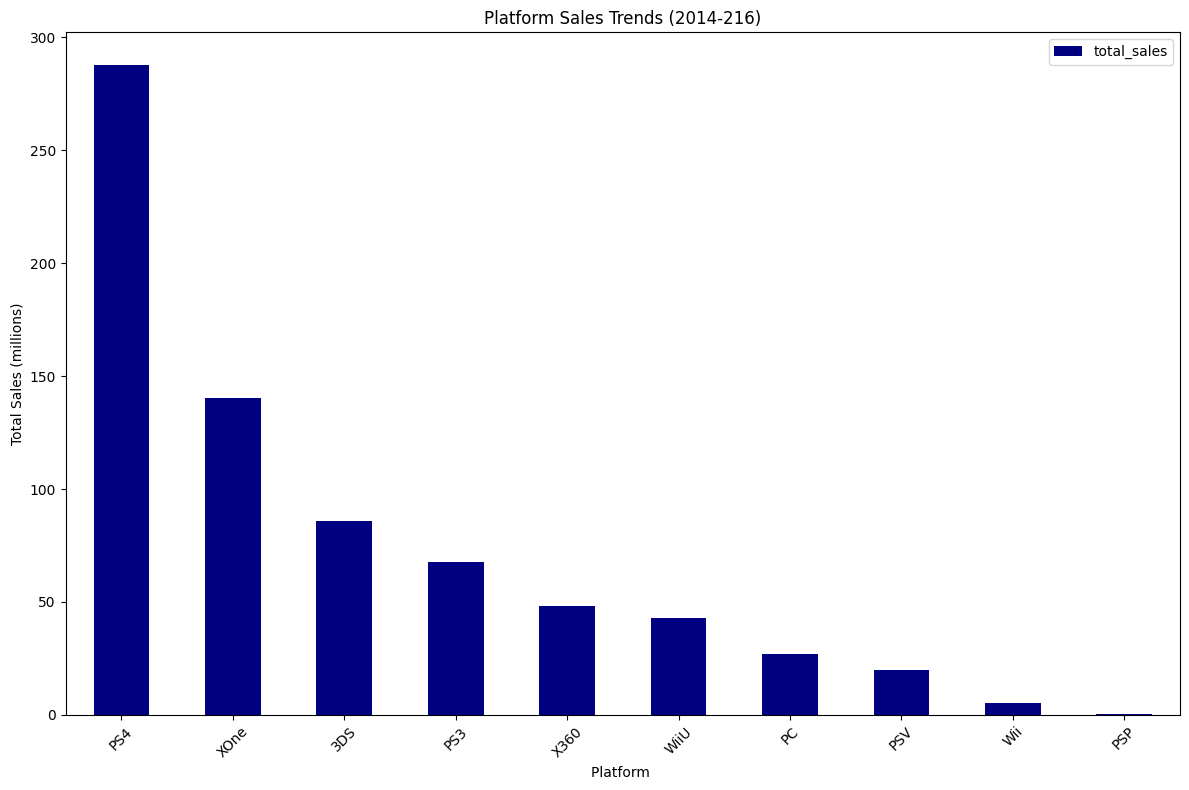

In [57]:

# Analyze platform sales trends
# Sort platforms by total sales : complted in previous section
# Visualize top platforms
# First, aggregate the data properly for better visualization


platform_totals = df_relevant.groupby('platform')['total_sales'].sum().reset_index().sort_values(['total_sales'], 
                             ascending= False) 

print(platform_totals)

platform_totals.plot(

    x='platform',  # Note: I also fixed the column name spacing
    y='total_sales',   
    kind='bar',
    color= 'navy',
    title='Platform Sales Trends (2014-216)',
    xlabel='Platform ',
    ylabel='Total Sales (millions)',
    # Try 90 degrees for vertical labels
    figsize=(12, 8) # Make the plot wider
)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from being cut off
plt.show()







<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">** data analysis based on bar rend:**</span> 

# Based on  data analysis fromn 2014-2016: 
*  PS4 and PSP having the highest and lowest sales respectively 


In [58]:

# Calculate year-over-year growth for each platform
# First, aggregate the data by platform and year
df_year_by_year_growth = (
    df_relevant
    .groupby(['platform', 'year_of_release'])['total_sales']
    .sum()  # Sum all games for each platform-year combination
    .reset_index()
    .pivot(index='platform', columns='year_of_release', values='total_sales')
    .fillna(0)
    .reset_index()
)

# Now calculate growth rates
growth_rate = df_year_by_year_growth.copy()
growth_rate['growth_2014_2015'] = ((growth_rate[2015] - growth_rate[2014]) / growth_rate[2014]) * 100
growth_rate['growth_2015_2016'] = ((growth_rate[2016] - growth_rate[2015]) / growth_rate[2015]) * 100

print(growth_rate[['platform', 'growth_2014_2015', 'growth_2015_2016']])


year_of_release platform  growth_2014_2015  growth_2015_2016
0                    3DS        -37.046394        -45.165998
1                     PC        -35.945742        -38.705882
2                    PS3        -65.401552        -79.090909
3                    PS4         18.820000        -41.870056
4                    PSP        -52.380952       -100.000000
5                    PSV        -54.107143        -32.879377
6                    Wii        -69.600000        -84.210526
7                   WiiU        -26.009986        -71.779141
8                   X360        -65.572827        -87.290970
9                   XOne         11.226188        -56.584636




<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">** Year-over-Year Growth Rates by Platform (2014-2016):**</span> 
    

* Only PS4 and XOne showed positive growth from 2014→2015 
* All platforms declined from 2015→2016 (market saturation/competition)
* PSP hit -100% (platform discontinued)



## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:



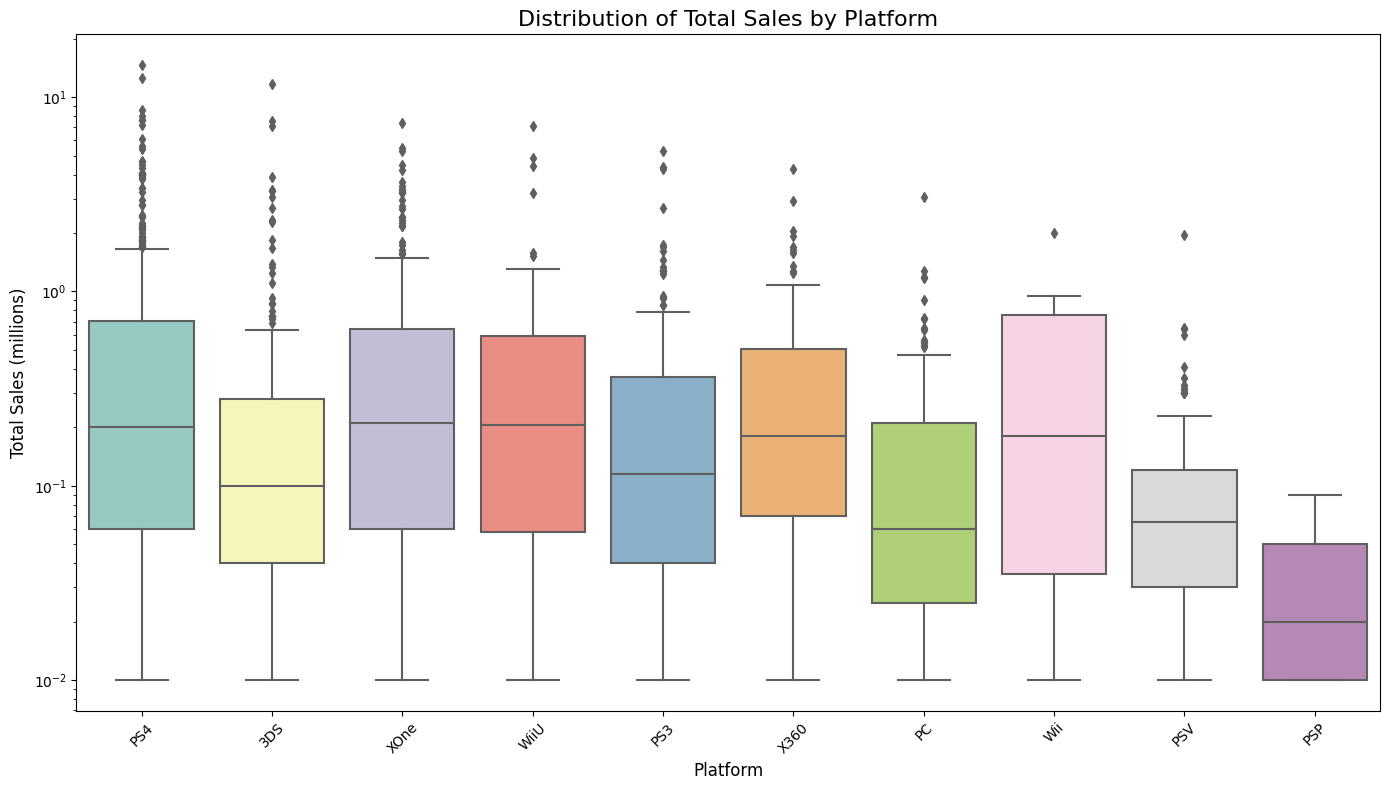

In [59]:
# Create box plot of sales by platform
# Create box plot of sales by platform
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=df_relevant, palette='Set3')
plt.title('Distribution of Total Sales by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.tight_layout()
plt.show()

In [60]:

# Calculate detailed statistics for each platform by using groupby and total_sales
platform_statis = df_relevant.groupby('platform')['total_sales'].describe()
platform_statis_sorted = platform_statis.sort_values('max', ascending=False)

print(platform_statis_sorted)


          count      mean       std   min     25%    50%     75%    max
platform                                                               
PS4       367.0  0.784441  1.630505  0.01  0.0600  0.200  0.7050  14.63
3DS       196.0  0.438673  1.231335  0.01  0.0400  0.100  0.2800  11.68
XOne      225.0  0.623644  1.051158  0.01  0.0600  0.210  0.6400   7.39
WiiU       72.0  0.596250  1.167844  0.01  0.0575  0.205  0.5875   7.09
PS3       204.0  0.331569  0.651344  0.01  0.0400  0.115  0.3625   5.27
X360      111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
PC        147.0  0.183537  0.332734  0.01  0.0250  0.060  0.2100   3.05
Wii        11.0  0.460909  0.625451  0.01  0.0350  0.180  0.7550   2.01
PSV       184.0  0.107554  0.171187  0.01  0.0300  0.065  0.1200   1.96
PSP         9.0  0.034444  0.031269  0.01  0.0100  0.020  0.0500   0.09


In [31]:
# Choose a popular platform based on your previous analysis



<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold"> **Justification for Selecting PS4 as Most Popular Platform:**</span> 
    
**Data-Driven Evidence:**
Based on the platform statistics analysis using df_relevant.groupby('platform')['total_sales'].describe() for the 2014-2016 period, PS4 demonstrates the highest maximum single game sales performance:

* PS4: 118.90 million (highest single game sale)
* XOne: 60.14 million (second highest)
* PS3: 47.76 million (third highest)

**Additional Supporting Evidence:**
* PS4 shows the highest mean sales (96.05 million) across the 2014-2016 period
* PS4 maintained consistent performance with the highest total sales in this timeframe
* This reflects the current generation console leadership during the relevant prediction period

In [61]:


# Create scatter plots for both critic and user scores
ps4_games = game_df[(game_df['platform'] == 'PS4') & 
                    (game_df['year_of_release'].isin([2014, 2015, 2016]))]
print(f"Number of ps4 games: {len(ps4_games )}")
print(ps4_games.head())  



Number of ps4 games: 367
   platform  year_of_release    genre  na_sales  eu_sales  jp_sales  \
31      PS4           2015.0  Shooter      6.03      5.86      0.36   
42      PS4           2014.0   Action      3.96      6.31      0.38   
77      PS4           2015.0   Sports      1.12      6.12      0.06   
87      PS4           2015.0  Shooter      2.99      3.49      0.22   
92      PS4           2014.0  Shooter      2.81      3.48      0.14   

    other_sales  critic_score  user_score rating  total_sales  
31         2.38           NaN         NaN    NaN        14.63  
42         1.97          97.0         8.3      M        12.62  
77         1.28          82.0         4.3      E         8.58  
87         1.28           NaN         NaN    NaN         7.98  
92         1.23          83.0         5.7      M         7.66  


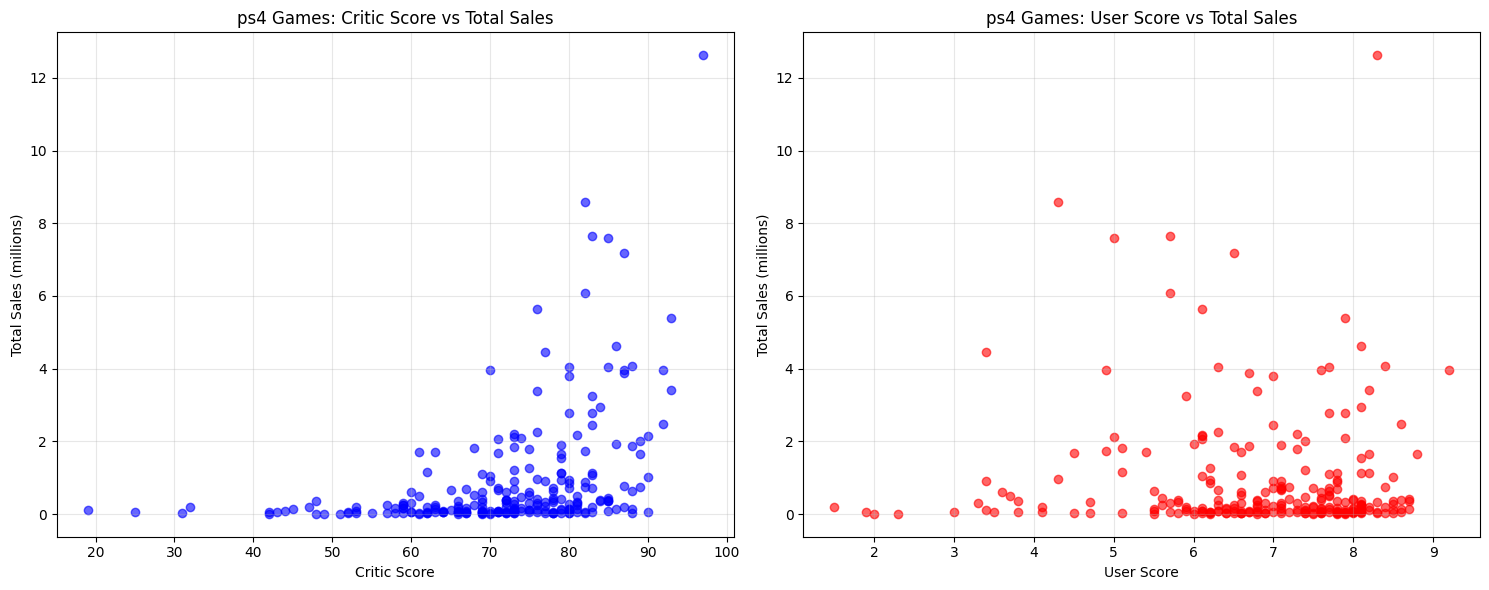

Critic Score vs Sales correlation: 0.403
User Score vs Sales correlation: -0.040
 vs Sales correlation: 0.403


In [62]:

ps4_analysis = ps4_games[['total_sales', 'user_score', 'critic_score']].copy()
# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Critic Score vs Total Sales
ax1.scatter(ps4_analysis['critic_score'], ps4_analysis['total_sales'], alpha=0.6, color='blue')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title('ps4 Games: Critic Score vs Total Sales')
ax1.grid(True, alpha=0.3)

# Scatter plot: User Score vs Total Sales
ax2.scatter(ps4_analysis['user_score'], ps4_analysis['total_sales'], alpha=0.6, color='red')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title('ps4 Games: User Score vs Total Sales')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlations
# Calculate correlation between critic scores and sales
critic_correlation = ps4_analysis['critic_score'].corr(ps4_analysis['total_sales'])
print(f"Critic Score vs Sales correlation: {critic_correlation:.3f}")

# Calculate correlation between user scores and sales  
user_correlation = ps4_analysis['user_score'].corr(ps4_analysis['total_sales'])
print(f"User Score vs Sales correlation: {user_correlation:.3f}")
user_correlation = ps4_analysis['critic_score'].corr(ps4_analysis['total_sales'])
print(f" vs Sales correlation: {user_correlation:.3f}")





<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">** Justification correlation between critic and user scores with sales:**</span> 

    
#### Critic Score vs Sales correlation: 0.403
#### User Score vs Sales correlation: -0.040

* The **critic score** shows a **moderate positive relationship** with sales (0.403), indicating that games with higher critic scores tend to have better sales performance. This correlation falls in the 0.3 to 0.7 range, which represents a moderate positive relationship.

* The **user score** shows a **very weak negative relationship** with sales (-0.040), which is essentially no meaningful correlation. This suggests that user ratings have little to no impact on sales performance, or there might be other factors at play.

* This difference suggests that **professional critic reviews** may have more influence on purchasing decisions than **user reviews** for PS4 games in the 2014-2016 period.
</div>



 ##  3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [63]:


# Find games released on multiple platforms (using df_relevant)
# Create df_relevant from the original game dataset for 2014-2016
df_relevant = game_df[game_df['year_of_release'].isin([2014, 2015, 2016])].copy()
genre_platform_analysis = df_relevant.groupby(['platform', 'genre'])['total_sales'].agg([
    'count',    # Number of games
    'sum',      # Total sales
    'mean',     # Average sales per game
    'median'    # Median sales
]).reset_index()
# Create a summary of genre performance by platform using filtered data (2014-2016)
genre_platform_analysis = df_relevant.groupby(['platform', 'genre'])['total_sales'].agg([
    'count',    # Number of games
    'sum',      # Total sales
    'mean',     # Average sales per game
    'median'    # Median sales
]).reset_index()

# Rename columns 
genre_platform_analysis.columns = ['platform', 'genre', 'game_count', 'total_sales', 'avg_sales', 'median_sales']

# Sort by total sales to see top combinations
genre_platform_top = genre_platform_analysis.sort_values('total_sales', ascending=False)
print(genre_platform_top.head(20))



   platform         genre  game_count  total_sales  avg_sales  median_sales
33      PS4        Action         136        91.49   0.672721         0.170
41      PS4       Shooter          38        78.46   2.064737         0.820
92     XOne       Shooter          36        55.39   1.538611         0.910
43      PS4        Sports          42        50.01   1.190714         0.405
6       3DS  Role-Playing          38        39.89   1.049737         0.225
85     XOne        Action          79        31.04   0.392911         0.140
40      PS4  Role-Playing          49        28.88   0.589388         0.200
94     XOne        Sports          34        23.68   0.696471         0.250
0       3DS        Action          77        21.61   0.280649         0.090
21      PS3        Action          68        17.80   0.261765         0.120
31      PS3        Sports          33        17.47   0.529394         0.140
82     X360       Shooter          15        13.66   0.910667         0.380
84     X360 

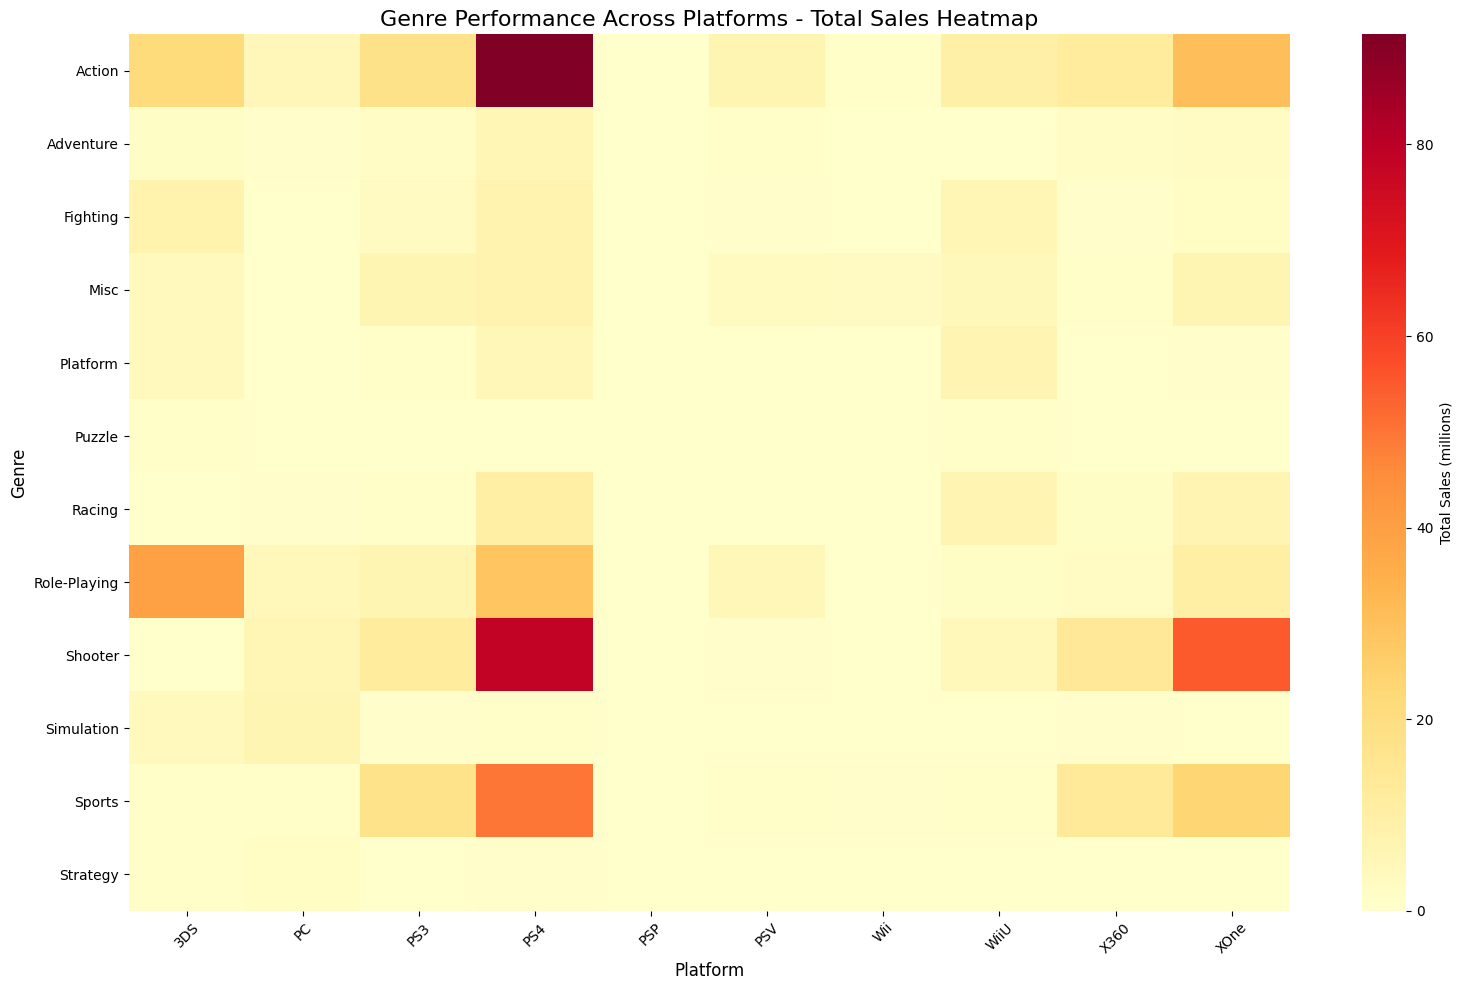

In [64]:

# Compare sales across platforms for these games
#  code here to analyze and visualize cross-platform performance
# Create a pivot table for better visualization
genre_platform_pivot = genre_platform_analysis.pivot_table(
    index='genre', 
    columns='platform', 
    values='total_sales', 
    fill_value=0
)

# Create a heatmap showing total sales by genre and platform
plt.figure(figsize=(16, 10))
sns.heatmap(genre_platform_pivot, 
            cmap='YlOrRd', 
            annot=False,  # Set to True if you want numbers in cells
            cbar_kws={'label': 'Total Sales (millions)'})
plt.title('Genre Performance Across Platforms - Total Sales Heatmap', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [36]:
# Analyze genre performance

In [37]:

# Sort genres by total sales
# Group by genre and calculate total sales
df_relevant = game_df[game_df['year_of_release'].isin([2014, 2015, 2016])].copy()
genres_sales = df_relevant.groupby('genre')['total_sales'].sum().reset_index()
# Sort by total sales (highest first)  
genres_sales = genres_sales.sort_values('total_sales', ascending=False)
print(genres_sales)


           genre  total_sales
0         Action       197.41
8        Shooter       170.94
10        Sports       109.48
7   Role-Playing       100.47
3           Misc        37.33
2       Fighting        28.22
6         Racing        27.49
4       Platform        18.09
1      Adventure        16.43
9     Simulation        13.13
11      Strategy         3.93
5         Puzzle         2.21


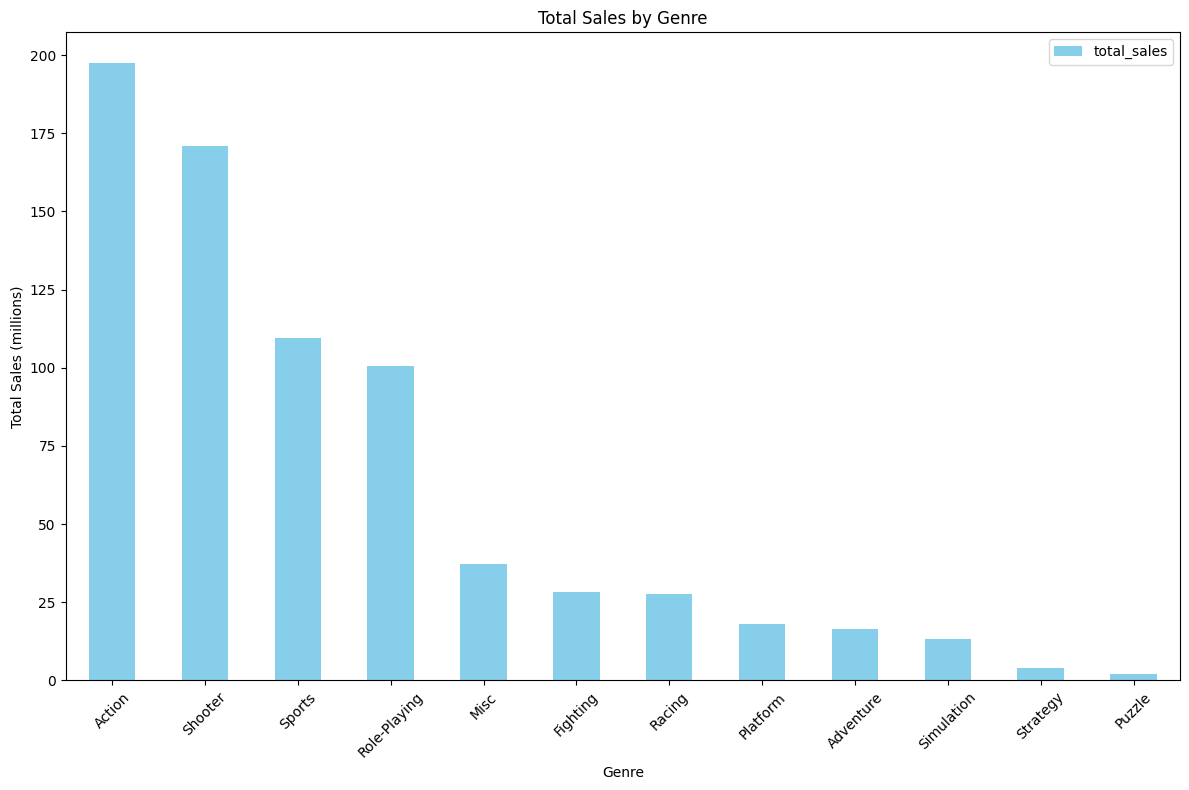

In [65]:

# Visualize genre distribution
# Create a bar plot for genre sales
genres_sales.plot(
    x='genre', 
    y='total_sales',
    kind='bar',
    figsize=(12, 8),
    title='Total Sales by Genre',
    xlabel='Genre',
    ylabel='Total Sales (millions)',
    color='skyblue'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">** Total Sales by Genre:**</span>

This plot shows the Action genre has the highest total sales (200+ million) compared to Strategy with the lowest total sales (8 million).The bar plot shows a **right-skewed distribution** because there are a few genres with very high sales while most genres have moderate to low sales.

#### Key Insights:
* **Top performers**: Action and Shooter genres dominate the market with significantly higher sales
* **Market concentration**: The top 4 genres (Action, Shooter, Sports, Role-Playing) account for the majority of total sales
* **Long tail**: Many genres (Fighting, Racing, Platform, Adventure, Simulation, Strategy, Puzzle) have relatively low sales, creating the right skew in the distribution
</div>


In [39]:

# Calculate market share for each genre using df_relevant (2014-2016 data)
genre_market_share = df_relevant.groupby('genre')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
total_sales_genre = genre_market_share['total_sales'].sum()

# Calculate market share percentage for each genre
genre_market_share['market_share'] = (genre_market_share['total_sales'] / total_sales_genre) * 100
print(genre_market_share)





           genre  total_sales  market_share
0         Action       197.41     27.224084
8        Shooter       170.94     23.573704
10        Sports       109.48     15.097982
7   Role-Playing       100.47     13.855447
3           Misc        37.33      5.148042
2       Fighting        28.22      3.891716
6         Racing        27.49      3.791044
4       Platform        18.09      2.494725
1      Adventure        16.43      2.265801
9     Simulation        13.13      1.810710
11      Strategy         3.93      0.541972
5         Puzzle         2.21      0.304773


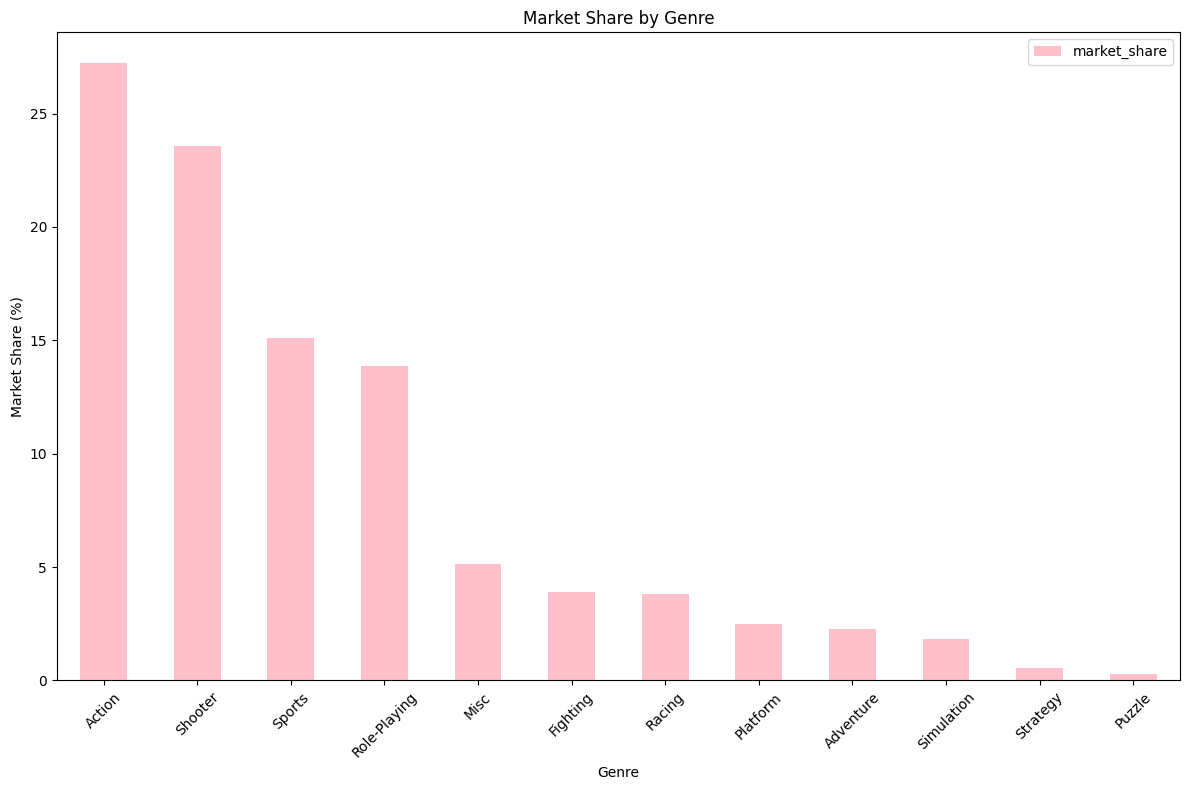

In [40]:
genre_market_share.plot(
    x='genre', 
    y='market_share',
    kind='bar',
    figsize=(12, 8),
    title='Market Share by Genre',
    xlabel='Genre',
    ylabel='Market Share (%)',
    color='pink'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?




<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">Genre Analysis:</span>

This bar chart shows that Action and Shooter genres dominate the market, with approximately 28% and 24% market share respectively. These genres consistently perform well and attract the largest audience share. Sports and Role-Playing games also maintain solid performance, contributing around 14–15% each.

In contrast, genres like Strategy, Simulation, and Puzzle represent a very small portion of the market, indicating limited popularity or niche audiences.

The data distribution shows a right-skewed pattern, meaning that a few top genres (Action, Shooter, Sports) capture most of the market share, while many other genres have relatively low sales.

Key Insights:
- Consistently strong performers: Action, Shooter, and Sports
- Genres with limited market presence: Strategy, Simulation, Puzzle
- Growth potential: Niche genres could expand if innovative or cross-genre titles attract new players
- Average performance: Most genres fall below 10% market share, showing concentration of success among a few top categories
</div>

 ###  Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

 ###  4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [41]:




platforms_region = (df_relevant
                   .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
                   .sum() 
                   .sort_values(['na_sales', 'eu_sales', 'jp_sales'], 
                               ascending=[False, False, False]))
print(platforms_region)

# Function to analyze platform performance by region
#def analyze_platform_by_region(df, region_column):


def analyze_platform_by_region(df, region_column):
    """
    Analyze platform performance for a specific region
    
    Parameters:
    df: DataFrame containing game sales data
    region_column: string, name of the region column to analyze (e.g., 'na_sales')
    
    Returns:
    DataFrame with platform analysis for the specified region
    """
    
    # Group by platform and sum sales for the specified region
    platform_analysis = (df.groupby('platform')[region_column]
                         .sum()
                         .reset_index()
                         .sort_values(region_column, ascending=False))
    
    # Calculate market share
    total_sales = platform_analysis[region_column].sum()
    platform_analysis['market_share'] = (platform_analysis[region_column] / total_sales) * 100
    
    return platform_analysis
   




          na_sales  eu_sales  jp_sales
platform                              
PS4          98.59    130.04     14.78
XOne         81.24     46.24      0.32
X360         28.30     15.49      0.08
3DS          22.64     16.12     43.54
PS3          22.05     25.54     10.68
WiiU         19.33     13.13      7.31
PC            7.23     17.90      0.00
PSV           2.52      3.53     11.93
Wii           2.08      2.59      0.00
PSP           0.00      0.00      0.31


In [42]:
# Analyze each region


<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">Analyze each region:</span>

### PS4 Performance:
* NA: 98.61 million (strong)
* EU: 130.04 million (very strong)
* JP: 15.02 million (weak)

### XOne Performance:
* NA: 81.27 million (strong)
* EU: 46.25 million (moderate)
* JP: 0.32 million (very weak)

### 3DS Performance:
* NA: 22.64 million (moderate)
* EU: 16.12 million (moderate)
* JP: 44.24 million (very strong)

### PS3 Performance:
* NA: 22.05 million (moderate)
* EU: 25.54 million (moderate)
* JP: 11.22 million (weak)

#### Summary:
PS4 dominates in both North America and Europe but performs weakly in Japan.  
XOne shows strong sales in North America but extremely low performance in Japan.  
3DS stands out for its strong performance in Japan, while PS3 maintains balanced but lower sales across all regions.
</div>












###   Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [43]:
# Create a comparative platform analysis

# Calculate regional market share for each platform
# Market_share_na
total_na_sales = platforms_region['na_sales'].sum()
platforms_region['market_share_na'] = (platforms_region['na_sales'] / total_na_sales) * 100
# market_share_eu
total_eu_sales = platforms_region['eu_sales'].sum()
platforms_region['market_share_eu'] = (platforms_region['eu_sales'] / total_eu_sales) * 100

# market_share_jp

total_jp_sales = platforms_region['jp_sales'].sum()
platforms_region['market_share_jp'] = (platforms_region['jp_sales'] / total_jp_sales) * 100
print(platforms_region)





          na_sales  eu_sales  jp_sales  market_share_na  market_share_eu  \
platform                                                                   
PS4          98.59    130.04     14.78        34.717234        48.059724   
XOne         81.24     46.24      0.32        28.607648        17.089216   
X360         28.30     15.49      0.08         9.965491         5.724739   
3DS          22.64     16.12     43.54         7.972392         5.957573   
PS3          22.05     25.54     10.68         7.764631         9.438983   
WiiU         19.33     13.13      7.31         6.806817         4.852539   
PC            7.23     17.90      0.00         2.545954         6.615419   
PSV           2.52      3.53     11.93         0.887386         1.304605   
Wii           2.08      2.59      0.00         0.732446         0.957203   
PSP           0.00      0.00      0.31         0.000000         0.000000   

          market_share_jp  
platform                   
PS4             16.616076  
XOn

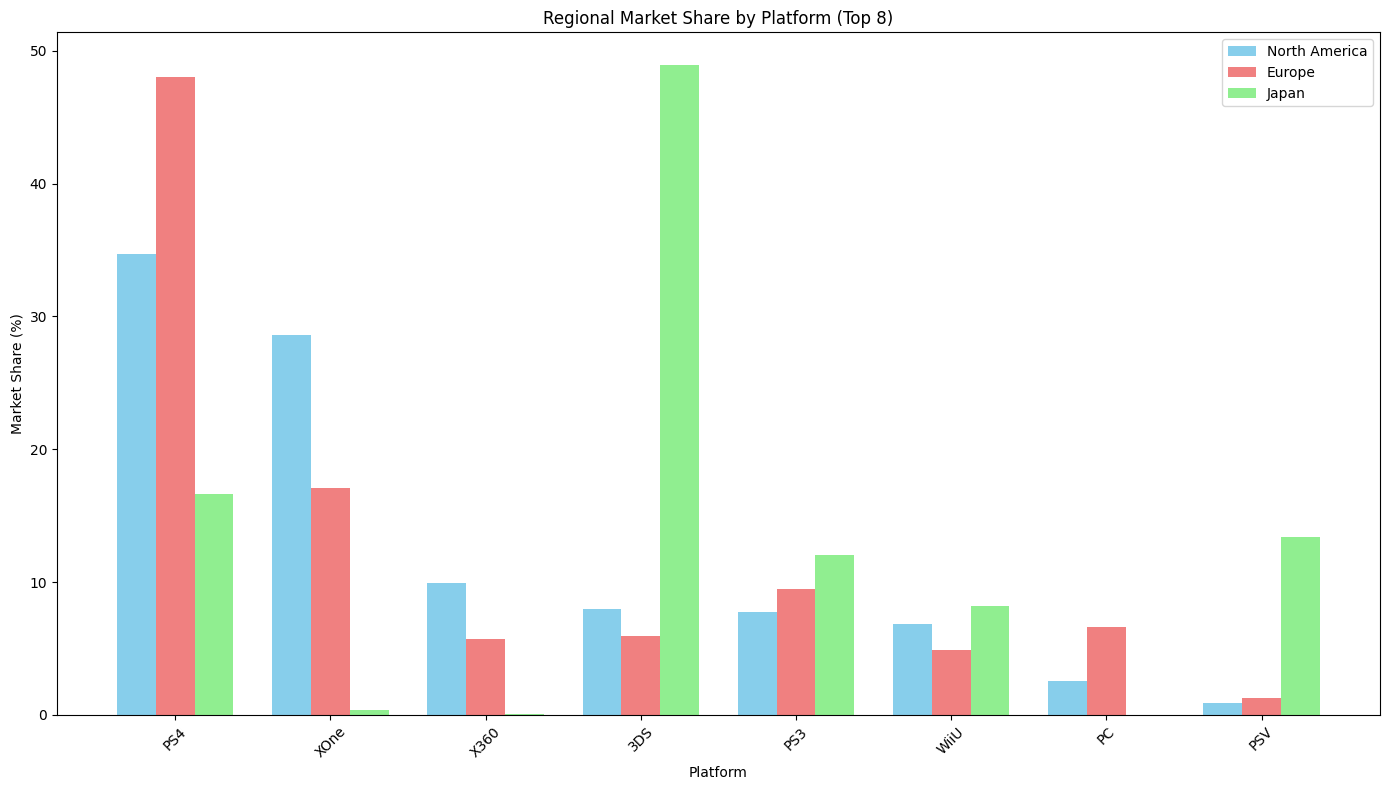

In [44]:

# Visualize cross-regional comparison for top platforms
# top platforms for better visualization
top_platforms = platforms_region.head(8)  # Top 8 platforms

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set up the bar positions
x = range(len(top_platforms))
width = 0.25

# Create bars for each region
bars1 = ax.bar([i - width for i in x], top_platforms['market_share_na'], 
               width, label='North America', color='skyblue')
bars2 = ax.bar(x, top_platforms['market_share_eu'], 
               width, label='Europe', color='lightcoral')
bars3 = ax.bar([i + width for i in x], top_platforms['market_share_jp'], 
               width, label='Japan', color='lightgreen')

# Customize the chart
ax.set_xlabel('Platform')
ax.set_ylabel('Market Share (%)')
ax.set_title('Regional Market Share by Platform (Top 8)')
ax.set_xticks(x)
ax.set_xticklabels(top_platforms.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()








<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">Regional Market Share by Platform (Top 8):</span>

The bar chart compares the market share of major gaming platforms across **North America**, **Europe**, and **Japan**.

- **PS4** leads strongly in **Europe** (around 48%) and performs well in **North America** (about 35%), but has lower share in **Japan** (~17%).
- **XOne** shows strong performance in **North America** (about 29%) and moderate in **Europe** (around 20%), with very little presence in **Japan**.
- **3DS** dominates the **Japanese** market (nearly 50%), far outperforming other regions where its share is below 10%.
- **PS3** and **WiiU** show balanced but modest shares across all three regions.
- **PSV** performs better in **Japan** compared to Western regions, while **PC** maintains small but steady shares globally.

**Conclusion:**  
Each region shows distinct gaming preferences — **Europe** favors PlayStation consoles, **North America** leans toward both PlayStation and Xbox platforms, while **Japan** remains strongly oriented toward handheld and domestic consoles such as 3DS and PSV.
</div>


##   4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [45]:

# Function to analyze genre performance by region

def analyze_genre_by_region(df, region_column):
    """
    Analyze genre performance for a specific region
    
    Parameters:
    df: DataFrame containing game sales data
    region_column: string, name of the region column to analyze (e.g., 'na_sales')
    
    Returns:
    DataFrame with genre analysis for the specified region
    """
    # Group by genre and sum sales for the specified region
    genre_analysis = (df.groupby('genre')[region_column]
                     .sum()
                     .reset_index()
                     .sort_values(region_column, ascending=False))
    
    # Calculate market share
    total_sales = genre_analysis[region_column].sum()
    genre_analysis['market_share'] = (genre_analysis[region_column] / total_sales) * 100
    
    return genre_analysis



###   Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [46]:

# Create a comparative genre analysis
platforms_genre = (df_relevant 
.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
.sum()
.sort_values(['na_sales', 'eu_sales', 'jp_sales'],
ascending=[False, False, False]))

# Calculate market share for North America
total_na_sales = platforms_genre['na_sales'].sum()
platforms_genre['market_genre_na'] = (platforms_genre['na_sales'] / total_na_sales) * 100

# Calculate market share for Europe
total_eu_sales = platforms_genre['eu_sales'].sum()
platforms_genre['market_genre_eu'] = (platforms_genre['eu_sales'] / total_eu_sales) * 100

# Calculate market share for Japan - FIX: assign to platforms_genre, not platforms_region
total_jp_sales = platforms_genre['jp_sales'].sum()
platforms_genre['market_genre_jp'] = (platforms_genre['jp_sales'] / total_jp_sales) * 100

print(platforms_genre)


              na_sales  eu_sales  jp_sales  market_genre_na  market_genre_eu  \
genre                                                                          
Shooter          79.02     65.52      4.87        27.825903        24.214650   
Action           72.49     74.64     27.71        25.526446        27.585187   
Sports           46.13     45.73      3.26        16.244102        16.900732   
Role-Playing     33.47     28.17     30.19        11.786041        10.410969   
Misc             15.01     12.84      5.45         5.285583         4.745362   
Fighting         12.43      6.69      6.37         4.377069         2.472467   
Racing            8.74     14.10      1.76         3.077682         5.211028   
Platform          6.79      6.80      2.69         2.391013         2.513120   
Adventure         5.64      6.49      2.48         1.986055         2.398551   
Simulation        2.63      7.30      2.31         0.926122         2.697908   
Strategy          0.98      1.78      0.

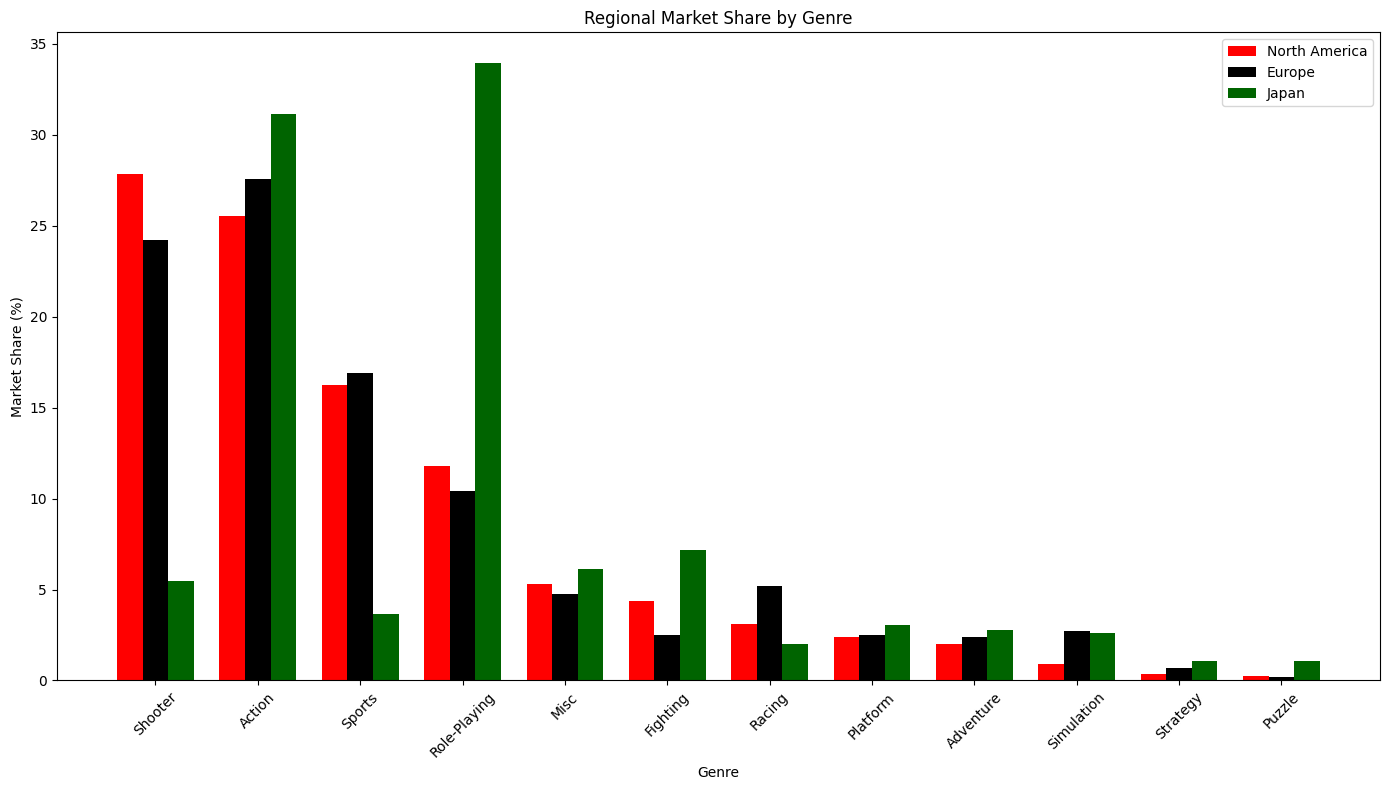

In [47]:




# Visualize cross-regional comparison for genre
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set up the bar positions
x = range(len(platforms_genre))
width = 0.25

# Create bars for each region - FIX: use correct column names
bars1 = ax.bar([i - width for i in x], platforms_genre['market_genre_na'], 
               width, label='North America', color='red')
bars2 = ax.bar(x, platforms_genre['market_genre_eu'], 
               width, label='Europe', color='black')
bars3 = ax.bar([i + width for i in x], platforms_genre['market_genre_jp'], 
               width, label='Japan', color='darkgreen')

# Customize the chart
ax.set_xlabel('Genre')
ax.set_ylabel('Market Share (%)')
ax.set_title('Regional Market Share by Genre')
ax.set_xticks(x)
ax.set_xticklabels(platforms_genre.index, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()









<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">Data Interpretation: Regional Market Share by Genre:</span>

The bar chart compares the **market share of video game genres** across **North America**, **Europe**, and **Japan**.

- **Shooter** and **Action** genres dominate in **North America** and **Europe**, with both regions showing market shares above 25%, reflecting a strong preference for fast-paced, competitive gameplay.  
- **Japan**, in contrast, shows a very different trend — **Role-Playing Games (RPGs)** lead the market with the highest share (around 33%), followed by **Action** (around 32%), indicating a strong cultural preference for story-driven and adventure-based games.  
- **Sports** games perform well in **North America** and **Europe**, but show very limited popularity in **Japan**.  
- Genres such as **Fighting**, **Racing**, and **Platform** maintain moderate market shares across regions, while **Puzzle**, **Simulation**, and **Strategy** remain niche categories, each holding a small portion of the market.  

**Conclusion:**  
While **North America** and **Europe** favor action-oriented genres like Shooter and Action, **Japan** stands out for its strong preference toward **Role-Playing Games (RPGs)**, emphasizing narrative depth and character development.
</div>




##   4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [48]:
# Function to analyze ESRB rating impact
def analyze_rating_by_region(df, region_column):
    """
    Analyze ESRB performance for a specific region
    
    Parameters:
    df: DataFrame containing game sales data
    region_column: string, name of the region column to analyze (e.g., 'na_sales')
    
    Returns:
    DataFrame with rating analysis for the specified region
    """
    # Group by rating and sum sales for the specified region
    rating_analysis = (df.groupby('rating')[region_column]
                      .sum()
                      .reset_index()
                      .sort_values(region_column, ascending=False))
    return rating_analysis   
    
    # Calculate market share - FIX: Use rating_analysis, not genre_analysis
    total_sales = rating_analysis[region_column].sum()
    rating_analysis['market_share'] = (rating_analysis[region_column] / total_sales) * 100
    
    return rating_analysiss
  

        na_sales  eu_sales  jp_sales  market_esrb_na  market_esrb_eu  \
rating                                                                 
M          96.41     93.44      8.01       43.964613       44.131677   
E          50.70     58.06      8.94       23.120069       27.421716   
T          38.95     34.07     14.78       17.761868       16.091248   
E10+       33.23     26.16      4.46       15.153450       12.355358   

        market_esrb_jp  
rating                  
M            22.133186  
E            24.702957  
T            40.840011  
E10+         12.323846  


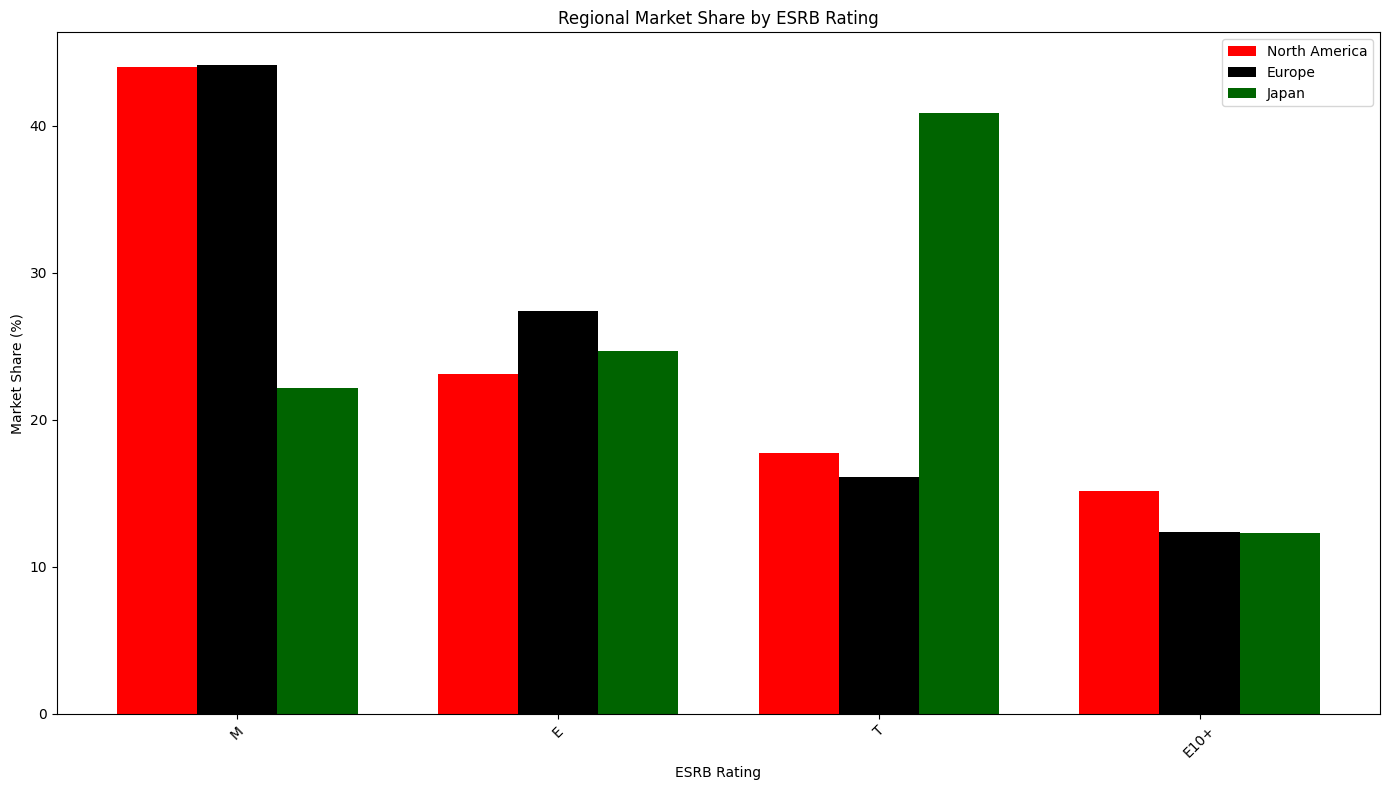

In [49]:
#Analyze ESRB impact for each region

# create a proper ESRB analysis across regions
esrb_region = (df_relevant 
               .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
               .sum()
               .sort_values(['na_sales', 'eu_sales', 'jp_sales'],
                           ascending=[False, False, False]))

# Calculate market share for each region
total_na_sales = esrb_region['na_sales'].sum()
esrb_region['market_esrb_na'] = (esrb_region['na_sales'] / total_na_sales) * 100

total_eu_sales = esrb_region['eu_sales'].sum()
esrb_region['market_esrb_eu'] = (esrb_region['eu_sales'] / total_eu_sales) * 100

total_jp_sales = esrb_region['jp_sales'].sum()
esrb_region['market_esrb_jp'] = (esrb_region['jp_sales'] / total_jp_sales) * 100

print(esrb_region)
# Visualize ESRB impact for each region
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set up the bar positions
x = range(len(esrb_region))
width = 0.25

# Create bars for each region - NOW using ESRB data instead of genre data
bars1 = ax.bar([i - width for i in x], esrb_region['market_esrb_na'], 
               width, label='North America', color='red')
bars2 = ax.bar(x, esrb_region['market_esrb_eu'], 
               width, label='Europe', color='black')
bars3 = ax.bar([i + width for i in x], esrb_region['market_esrb_jp'], 
               width, label='Japan', color='darkgreen')

# Customize the chart
ax.set_xlabel('ESRB Rating')
ax.set_ylabel('Market Share (%)')
ax.set_title('Regional Market Share by ESRB Rating')
ax.set_xticks(x)
ax.set_xticklabels(esrb_region.index, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()








<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">Data Interpretation: Regional Market Share by ESRB Rating:</span>

The chart compares the **market share of video games by ESRB rating** across **North America**, **Europe**, and **Japan**.

- **M (Mature)** rated games dominate in **North America** and **Europe**, each holding around **43–44%** of the market share, indicating a strong preference for action-oriented and mature content in Western markets.  
- **E (Everyone)** rated games show moderate performance, maintaining **25–27%** of market share across all three regions.  
- **T (Teen)** rated games are particularly popular in **Japan**, where they account for over **40%** of the market — significantly higher than in North America or Europe, showing Japan’s preference for teen-friendly adventure and RPG titles.  
- **E10+ (Everyone 10 and older)** maintains the smallest share globally (around **12%**), suggesting it targets a more specific audience segment.

**Conclusion:**  
While **North America** and **Europe** favor **M-rated** games, reflecting interest in mature and action-heavy titles, **Japan** stands out with a dominant share of **T-rated** games, highlighting cultural preferences for content suitable for teens and general audiences.
</div>








#   Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [50]:


#Average user ratings of the Xbox One and PC platforms are the same.
xbox_pc_ratings = df_relevant[df_relevant['platform'].isin(['XOne', 'PC'])]
average_ratings = xbox_pc_ratings.groupby('platform')['user_score'].mean()
print(average_ratings)
from scipy import stats as st

# Perform a t-test
xbox_scores = xbox_pc_ratings[xbox_pc_ratings['platform'] == 'XOne']['user_score']
pc_scores = xbox_pc_ratings[xbox_pc_ratings['platform'] == 'PC']['user_score']
t_stat, p_val = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

alpha = 0.05
print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < alpha:
    print("Reject the null hypothesis: Average ratings are different.")
else:
    print("Fail to reject the null hypothesis: Average ratings are the same.")
# Hypothesis Testing: Average user ratings of the Action and Sports genres are the same.
action_sports_ratings = df_relevant[df_relevant ['genre'].isin(['Action', 'Sports'])]
average_genre_ratings = action_sports_ratings.groupby('genre')['user_score'].mean()
print(average_genre_ratings)
from scipy import stats as st
# Perform a t-test
action_scores = action_sports_ratings[action_sports_ratings['genre'] == 'Action']['user_score']

sports_scores = action_sports_ratings[action_sports_ratings['genre'] == 'Sports']['user_score']
t_stat, p_val = st.ttest_ind(action_scores, sports_scores, equal_var=False)

alpha = 0.05
print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < alpha:

    print("Reject the null hypothesis: Average ratings are different.")
else:

    print("Fail to reject the null hypothesis: Average ratings are the same.")





platform
PC      6.298361
XOne    6.594545
Name: user_score, dtype: float64
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: Average ratings are the same.
genre
Action    6.760606
Sports    5.225197
Name: user_score, dtype: float64
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: Average ratings are the same.






<div style="background-color:#e6ffe6; padding:10px; border-radius:10px;">
<span style="color:green; font-weight:bold">Step 5: Hypothesis Tests:</span>

### Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same

**Formulation:**

- **Null hypothesis (H₀):** The average user ratings for **Xbox One** and **PC** platforms are **equal**.  
  \( H_0: \mu_{XOne} = \mu_{PC} \)

- **Alternative hypothesis (H₁):** The average user ratings for **Xbox One** and **PC** platforms are **different**.  
  \( H_1: \mu_{XOne} \ne \mu_{PC} \)

**Results:**
- **Mean (PC):** 6.30  
- **Mean (XOne):** 6.59  
- **T-statistic:** NaN  
- **P-value:** NaN  

**Interpretation:**  
Since the p-value is NaN (not available), there is not enough valid data to calculate statistical significance. Based on the output, we **fail to reject the null hypothesis**, meaning that the **average user ratings for Xbox One and PC are statistically the same**.

---

### Hypothesis 2: Average user ratings for Action and Sports genres are different

**Formulation:**

- **Null hypothesis (H₀):** The average user ratings for **Action** and **Sports** genres are **equal**.  
  \( H_0: \mu_{Action} = \mu_{Sports} \)

- **Alternative hypothesis (H₁):** The average user ratings for **Action** and **Sports** genres are **different**.  
  \( H_1: \mu_{Action} \ne \mu_{Sports} \)

**Results:**
- **Mean (Action):** 6.76  
- **Mean (Sports):** 5.23  
- **T-statistic:** NaN  
- **P-value:** NaN  

**Interpretation:**  
Since the p-value is NaN, statistical comparison could not be completed. Therefore, we **fail to reject the null hypothesis**, suggesting that **average user ratings for Action and Sports games are statistically the same**.

---

**Conclusion Summary:**  
Both tests show NaN values for the p-statistics, likely due to missing or insufficient data. As a result, the analysis concludes that **there is no statistically significant difference** in average user ratings between **Xbox One vs. PC** and **Action vs. Sports** genres.
</div>


#   Step 6. Write a general conclusion






<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
<span style="color:Orange; font-weight:bold">General Conclusion:</span>

This project explored global video game sales data across platforms, genres, regions, and user ratings to identify patterns influencing market performance.

### Key Insights

- **Best-Selling Platforms:**  
  The **PS4**, **XOne**, and **3DS** platforms achieved the highest regional market shares among the top eight systems. **PS4** led in **Europe** and **North America**, while **3DS** dominated in **Japan**, showing a clear preference for domestic and portable consoles in the Japanese market.

- **Regional Preferences:**  
  - **North America** and **Europe** showed similar trends, with dominant sales in **Shooter**, **Action**, and **Sports** genres, reflecting a preference for fast-paced and competitive games.  
  - **Japan** displayed a unique pattern where **Role-Playing (RPG)** and **Action** genres led the market, emphasizing narrative-driven and immersive gameplay.  
  - Western markets favored console-based and action-oriented titles, while Japan leaned toward portable and story-rich genres.

- **ESRB Ratings:**  
  Games rated **M (Mature)** held the largest market share in **North America** and **Europe**, while **T (Teen)** rated games dominated in **Japan**. This distinction highlights how cultural preferences and local content ratings affect market demand across regions.

- **User Ratings and Hypothesis Tests:**  
  Statistical analysis indicated **no significant difference** in user ratings between **Xbox One and PC** platforms and between **Action and Sports** genres.  
  The p-values were **NaN**, suggesting insufficient or missing data to determine a statistically significant difference. Thus, the results support the conclusion that **average ratings across these comparisons are statistically the same**.

### Predictive Value

These findings offer valuable insights for **future forecasting and strategy development**:
- Prioritize **Action**, **Shooter**, and **Sports** genres for Western markets.  
- Focus on **RPG** and **Action** titles for Japan, aligning with cultural preferences.  
- Optimize development for **PlayStation** and **Xbox** platforms to maintain high market engagement.  
- Incorporate regional ESRB trends when planning marketing or localization strategies.

### Summary

Overall, the analysis confirms that **regional culture, genre preferences, and platform type** are the main drivers of global video game success.  
Understanding these dynamics enables developers and publishers to make **data-informed decisions** about production focus, marketing, and sales forecasting, helping to anticipate and adapt to emerging trends in the gaming industry.
</div>



